In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
# To display multiple outputs from the same cell use the following codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change the width of the current notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# Load relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats # Statistics libray
from scipy.stats import zscore # z-score for normalisation

from sklearn.cluster import KMeans # k-means clustering

In [5]:
import os
print(os.getcwd())

C:\Users\hmbar


In [6]:
import os
print(os.listdir())

['.anaconda', '.aws', '.azure', '.boto', '.conda', '.condarc', '.continuum', '.cursor', '.dbus-keyrings', '.docker', '.gitconfig', '.gradle', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kube', '.lesshst', '.matplotlib', '.nbi', '.node_repl_history', '.packettracer', '.VirtualBox', '.vscode', 'Accident Data Bromley.ipynb', 'AccidentBorough_City_Of_London.xlsx', 'AccidentLondonBorough Bromley E09000006.csv', 'Accidents_Data Bromley.ipynb', 'Accident_London_Borough.csv', 'african_crises.csv', 'AI COURSEWORK.ipynb', 'AI Dataset.csv', 'anaconda3', 'AppData', 'Application Data', 'blood_pressure.csv', 'Bromley Accident Data Mining Project (1).ipynb', 'Bromley Accident Data Mining Project.ipynb', 'Cisco Packet Tracer 8.2.0', 'Class Work Week 4 Slicing.ipynb', 'class_imbalance_bar_plot.png', 'class_imbalance_pie_chart.png', 'Contacts', 'Cookies', 'crnn_text_detection_&_mlops', 'crnn_text_detection_&_mlops_workflow', 'Data Analytics Practices', 'Diamond Data Classwork Exercise.ipynb', 'diamo

In [7]:
df = pd.read_csv('Accident_London_Borough.csv')
# View first few rows
df.shape



(145222, 32)

In [8]:
# Reading the CSV file
df_whole = pd.read_csv('Accident_London_Borough.csv')

# Display unique values in the 'Local_Authority_Highway' column
df_whole['Local_Authority_Highway'].unique()


array(['E09000020', 'E09000033', 'E09000013', 'E09000001', 'E09000030',
       'E09000028', 'E09000012', 'E09000019', 'E09000007', 'E09000022',
       'E09000005', 'E09000014', 'E09000003', 'E09000009', 'E09000027',
       'E09000031', 'E09000025', 'E09000017', 'E09000015', 'E09000018',
       'E09000010', 'E09000026', 'E09000002', 'E09000016', 'E09000008',
       'E09000032', 'E09000029', 'E09000023', 'E09000006', 'E09000011',
       'E09000004', 'E09000021', 'E09000024'], dtype=object)

In [9]:
# Filter rows where 'Local_Authority_Highway' equals 'E09000001'
df = df_whole.loc[df_whole['Local_Authority_Highway'] == 'E09000001'].copy()

# Display unique values in the 'Local_Authority_Highway' column
df['Local_Authority_Highway'].unique()


array(['E09000001'], dtype=object)

In [10]:
print(df.shape)


(1983, 32)


In [11]:
from IPython.display import display, HTML
import pandas as pd

# Display samples of the data
print('Samples of the data:')
display(HTML(df.head().to_html()))  # Display the first 5 rows as a table

# Display data types
print('Data types recognized by Python:')
display(HTML(df.dtypes.to_frame(name="Data Type").to_html()))  # Convert data types to a table

# Display total number of rows and columns
print('The total number of rows and columns in the data:')
rows, columns = df.shape
display(HTML(f"<table><tr><th>Rows</th><th>Columns</th></tr><tr><td>{rows}</td><td>{columns}</td></tr></table>"))

# Adjust display for Jupyter Notebook
display(HTML("<style>.container { width:100% !important; }</style>"))



Samples of the data:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
742,200501CP00001,533230,181490,-0.081260,51.516575,48,3,2,1,01/01/2005,7,22:50,570,E09000001,3,10,6,30,3,2,3,1211,0,5,4,1,1,0,0,1,1,E01000004
743,200501CP00002,533740,180550,-0.074271,51.508007,48,3,2,1,02/01/2005,1,20:50,570,E09000001,3,100,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01004293
744,200501CP00003,533230,181500,-0.081256,51.516665,48,3,3,1,02/01/2005,1,10:02,570,E09000001,3,10,6,30,3,2,3,1211,0,5,1,1,1,0,0,1,1,E01000004
745,200501CP00004,531750,180830,-0.102824,51.510991,48,3,2,3,08/01/2005,7,02:45,570,E09000001,3,3211,2,30,3,2,3,3211,0,5,4,2,2,0,0,1,1,E01000004
746,200501CP00005,532930,181500,-0.085578,51.516735,48,3,1,1,04/01/2005,3,12:30,570,E09000001,3,1211,3,30,3,2,6,0,0,5,1,1,1,0,0,1,1,E01000004


Data types recognized by Python:


,Data Type
Accident_Index,object
Location_Easting_OSGR,int64
Location_Northing_OSGR,int64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Date,object


The total number of rows and columns in the data:


Rows,Columns
1983,32


In [12]:
from IPython.display import display, HTML

# Check for duplicates based on 'Accident_Index' column
duplicate_count = df.duplicated(subset='Accident_Index').sum()

# Display the result in a table format
duplicate_summary = {
    "Description": ["Total Rows", "Total Duplicates (Accident_Index)"],
    "Count": [df.shape[0], duplicate_count]
}

# Convert to DataFrame for structured display
duplicate_table = pd.DataFrame(duplicate_summary)

# Display the table
display(HTML(duplicate_table.to_html(index=False)))


Description,Count
Total Rows,1983
Total Duplicates (Accident_Index),0


In [13]:
# Select integer columns
integer_columns = df.select_dtypes(include=['int64']).columns

# Count unique values in each integer column
unique_values_summary = {
    "Column": [],
    "Unique Values Count": []
}

for col in integer_columns:
    unique_values_summary["Column"].append(col)
    unique_values_summary["Unique Values Count"].append(df[col].nunique())

# Convert the summary to a DataFrame for structured display
unique_values_table = pd.DataFrame(unique_values_summary)

# Display the table
from IPython.display import display, HTML
display(HTML(unique_values_table.to_html(index=False)))


Column,Unique Values Count
Location_Easting_OSGR,272
Location_Northing_OSGR,155
Police_Force,1
Accident_Severity,3
Number_of_Vehicles,4
Number_of_Casualties,7
Day_of_Week,7
Local_Authority_District,1
1st_Road_Class,4
1st_Road_Number,20


In [14]:
# Summary statistics for numerical columns in the filtered dataset
numerical_summary = df.describe()

# Summary statistics for categorical (object) columns in the filtered dataset
categorical_summary = df.describe(include='object')

# Display both summaries in a structured format
from IPython.display import display, HTML
print("Numerical Columns Summary:")
display(HTML(numerical_summary.to_html()))

print("Categorical Columns Summary:")
display(HTML(categorical_summary.to_html()))


Numerical Columns Summary:


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_District,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.0,1983.000000,1983.000000,1983.000000,1983.000000,1983.0,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.0,1983.000000
mean,532531.931417,181183.388805,-0.091430,51.513983,48.0,2.854261,1.645991,1.121029,4.104387,570.0,3.804337,534.583459,5.001513,29.989914,3.351992,2.149269,3.421079,261.525971,0.003026,2.395361,1.779627,1.251135,1.179526,0.185073,0.081694,1.0,1.221886
std,709.060756,338.429646,0.010198,0.003066,0.0,0.365573,0.554536,0.464129,1.655403,0.0,0.998001,1053.355001,1.588778,0.550112,2.374850,1.852783,2.467897,804.324368,0.077752,2.507711,1.335062,1.026131,0.392981,0.864445,0.632442,0.0,0.415620
min,530940.000000,180120.000000,-0.114204,51.504174,48.0,1.000000,1.000000,1.000000,1.000000,570.0,3.000000,0.000000,1.000000,20.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
25%,531810.000000,180930.000000,-0.101829,51.511689,48.0,3.000000,1.000000,1.000000,3.000000,570.0,3.000000,0.000000,3.000000,30.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
50%,532700.000000,181150.000000,-0.088901,51.513746,48.0,3.000000,2.000000,1.000000,4.000000,570.0,3.000000,10.000000,6.000000,30.000000,3.000000,2.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
75%,533090.000000,181460.000000,-0.083362,51.516512,48.0,3.000000,2.000000,1.000000,5.000000,570.0,5.000000,201.000000,6.000000,30.000000,6.000000,4.000000,5.000000,0.000000,0.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
max,533840.000000,182080.000000,-0.072690,51.522147,48.0,3.000000,4.000000,10.000000,7.000000,570.0,6.000000,4208.000000,9.000000,40.000000,9.000000,4.000000,6.000000,4208.000000,2.000000,8.000000,7.000000,9.000000,4.000000,6.000000,6.000000,1.0,2.000000


Categorical Columns Summary:


,Accident_Index,Date,Time,Local_Authority_Highway,LSOA_of_Accident_Location
count,1983,1983,1983,1983,1973
unique,1983,1229,752,1,20
top,200501CP00001,16/12/2008,08:30,E09000001,E01000004
freq,1,6,24,1983,1686


Missing values per variable by count:
Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                             

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Where a missing value has been found')

<Figure size 800x600 with 0 Axes>

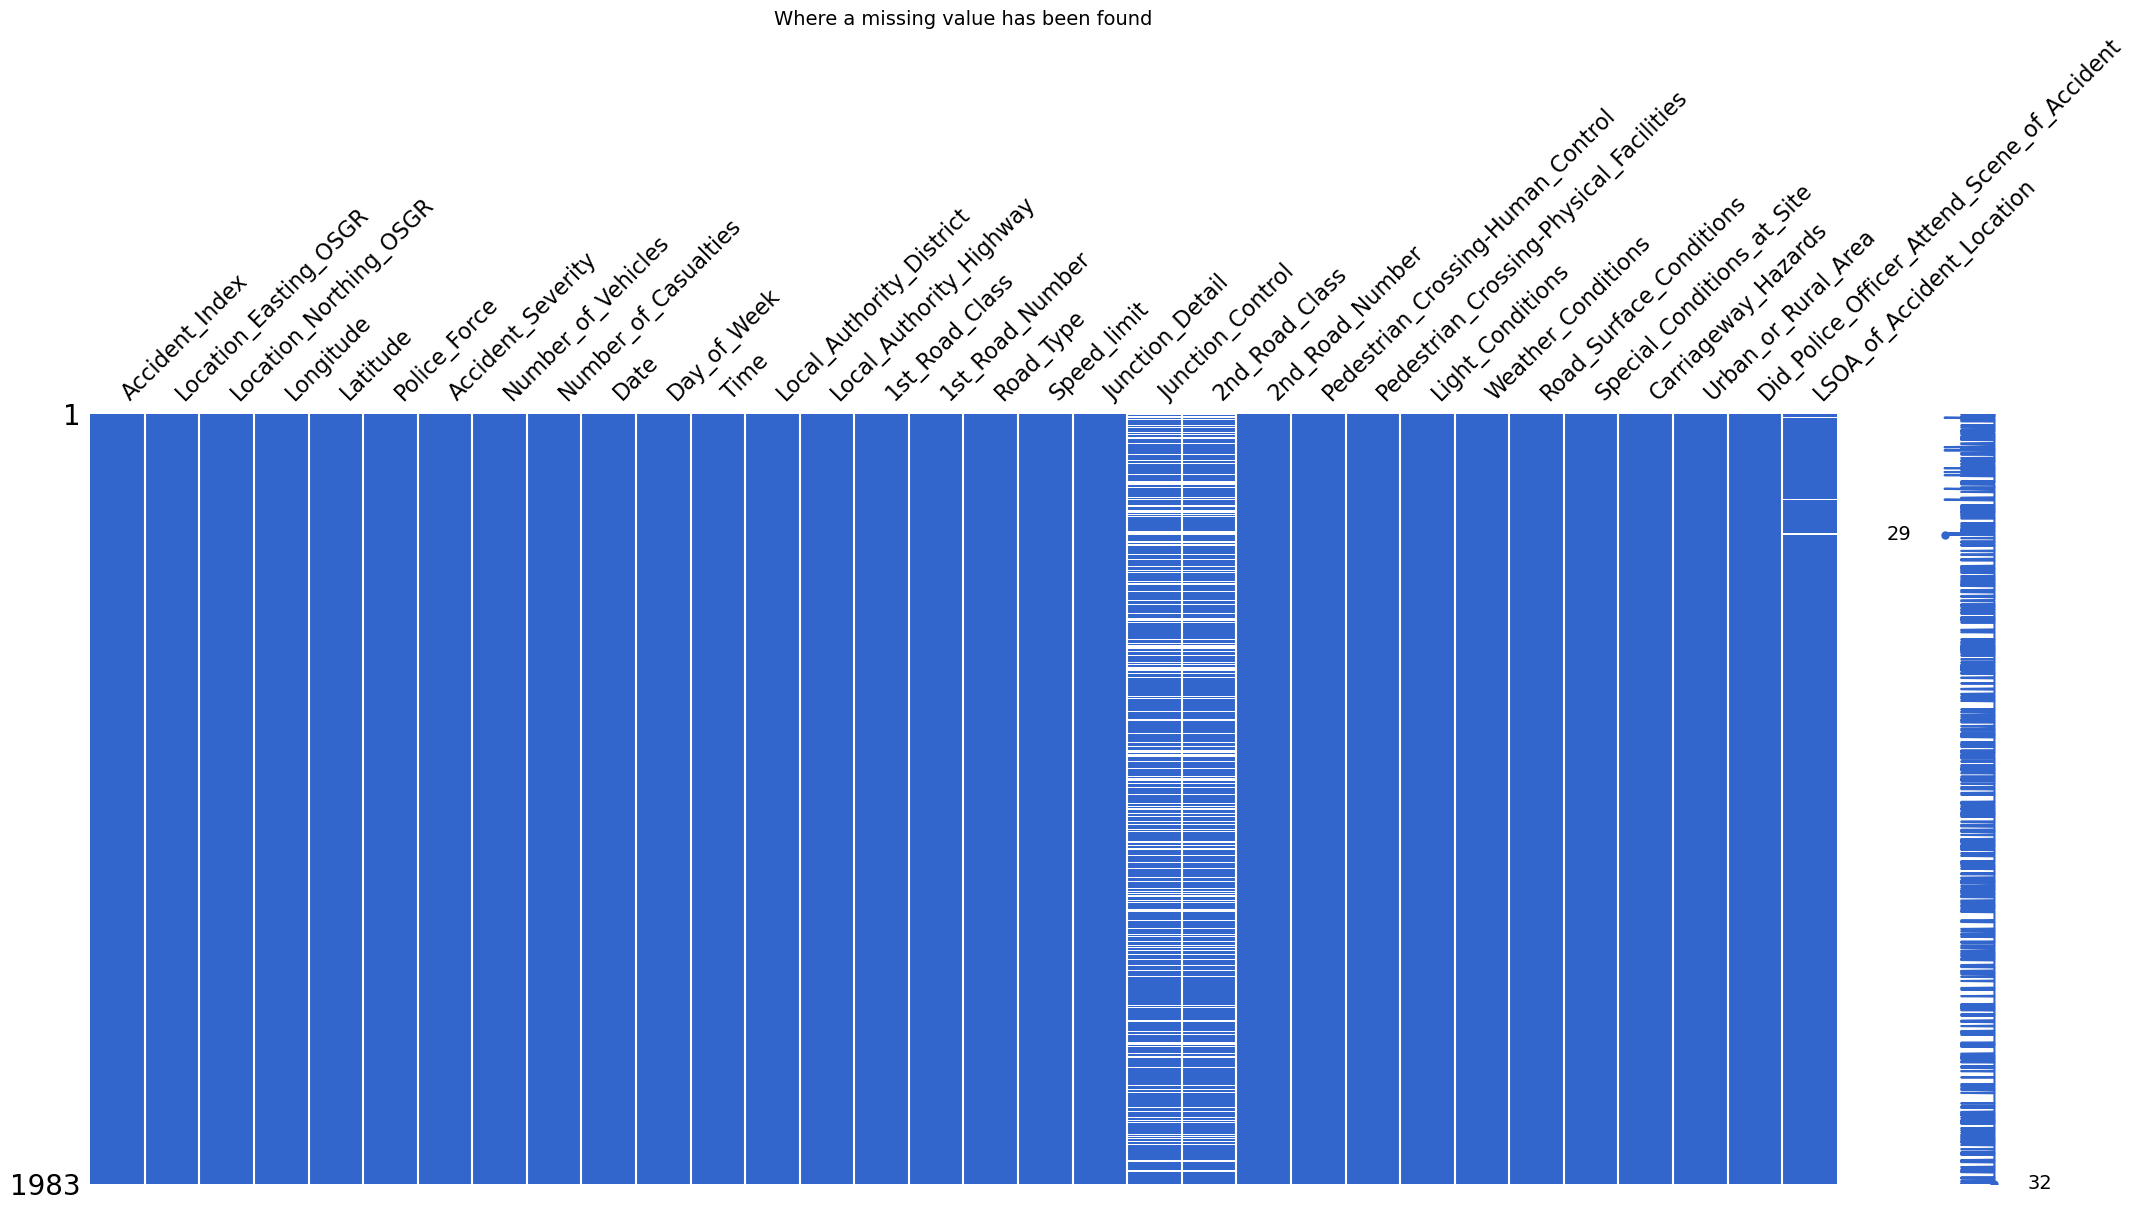

In [15]:
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Replace -1 with NaN in the filtered dataset
df.replace({-1: np.nan}, inplace=True)

# Calculate and print missing values by count
missing_values_count = df.isnull().sum()
print('Missing values per variable by count:')
print(missing_values_count)

# Calculate and print missing values by percentage
missing_values_percentage = (missing_values_count / len(df)) * 100
print('\nMissing values per variable by percentage:')
print(missing_values_percentage)

# Create a missing values matrix with color
plt.figure(figsize=(8, 6))
msno.matrix(df, color=(0.2, 0.4, 0.8))  # Adjust the color here
plt.title('Where a missing value has been found', fontsize=14)
plt.show()


417 rows containing a missing value as shown below:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
743,200501CP00002,533740,180550,-0.074271,51.508007,48,3,2,1,02/01/2005,...,0,0,4,1,1,0,0,1,1,E01004293
748,200501CP00008,531830,181810,-0.101306,51.519779,48,2,2,1,10/01/2005,...,0,0,1,1,1,0,0,1,2,E01002705
751,200501CP00011,533630,180150,-0.076006,51.504439,48,3,3,1,18/01/2005,...,0,0,4,2,2,0,0,1,1,NaN
752,200501CP00012,533270,181570,-0.080654,51.517284,48,3,1,1,14/01/2005,...,0,4,1,1,1,0,0,1,1,E01000004
756,200501CP00016,531490,181370,-0.106368,51.515904,48,3,2,1,23/01/2005,...,0,1,1,1,1,0,0,1,1,E01000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122142,201001CP00360,533000,180680,-0.084878,51.509350,48,3,3,1,20/12/2010,...,0,0,1,1,4,0,0,1,1,E01000004
126537,201001HT20290,533750,180580,-0.074115,51.508274,48,3,2,1,30/04/2010,...,0,0,1,1,1,0,0,1,2,E01004293
126606,201001HT20367,533750,180580,-0.074115,51.508274,48,3,1,1,02/06/2010,...,0,0,1,1,1,0,0,1,1,E01004293
131847,201001MM70780,533630,180170,-0.075999,51.504618,48,3,2,1,16/09/2010,...,0,0,1,1,1,0,0,1,2,E01004027


3 columns containing a missing value as shown below:


,Junction_Control,2nd_Road_Class,LSOA_of_Accident_Location
742,2.0,3.0,E01000004
743,NaN,NaN,E01004293
744,2.0,3.0,E01000004
745,2.0,3.0,E01000004
746,2.0,6.0,E01000004
...,...,...,...
127007,4.0,3.0,E01000005
127029,4.0,3.0,E01004320
131847,NaN,NaN,E01004027
137220,2.0,3.0,E01000005


Any rows or columns containing a missing value:


,Junction_Control,2nd_Road_Class,LSOA_of_Accident_Location
743,NaN,NaN,E01004293
748,NaN,NaN,E01002705
751,NaN,NaN,NaN
752,NaN,NaN,E01000004
756,NaN,NaN,E01000004
...,...,...,...
122142,NaN,NaN,E01000004
126537,NaN,NaN,E01004293
126606,NaN,NaN,E01004293
131847,NaN,NaN,E01004027


<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Where a missing value has been found')

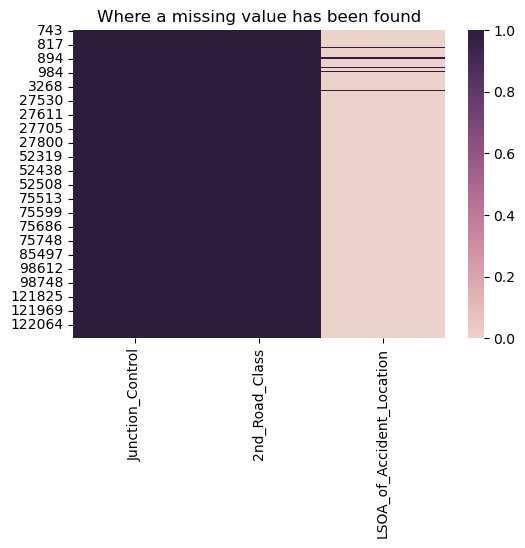

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify any rows containing a missing value
df_null_row = df[df.isna().any(axis=1)]

# Identify any columns containing a missing value
df_null_col = df[df.columns[df.isna().any()]]

# Identify any rows or columns containing a missing value
df_null_only = df_null_row[df_null_row.columns[df_null_row.isna().any()]]

# Print details about rows and columns containing missing values
print(f"{len(df_null_row)} rows containing a missing value as shown below:")
display(df_null_row)

print(f"{len(df_null_col.columns)} columns containing a missing value as shown below:")
display(df_null_col)

print("Any rows or columns containing a missing value:")
display(df_null_only)

# Visualize missing values
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(df_null_only.isna(), cmap=sns.cubehelix_palette(as_cmap=True), alpha=1) \
   .set_title('Where a missing value has been found')
plt.show()


In [17]:
import pandas as pd

# Set the correct path for your guide file
file_path_guide = "Road-Accident-Safety-Data-Guide (2).xls"  # Replace with the exact path if needed

# Ensure your filtered dataset is loaded (use df for your filtered data)
filtered_data = df.copy()

# Define mappings between dataset columns and guide file sheet names
encoded_columns_mappings = {
    'Police_Force': 'Police Force',
    'Accident_Severity': 'Accident Severity',
    'Day_of_Week': 'Day of Week',
    'Local_Authority_District': 'Local Authority (District)',
    'Local_Authority_Highway': 'Local Authority (Highway)',
    '1st_Road_Class': '1st Road Class',
    'Road_Type': 'Road Type',
    'Junction_Detail': 'Junction Detail',
    'Junction_Control': 'Junction Control',
    '2nd_Road_Class': '2nd Road Class',
    'Light_Conditions': 'Light Conditions',
    'Special_Conditions_at_Site': 'Special Conditions at Site',
    'Pedestrian_Crossing-Human_Control': 'Ped Cross - Human',
    'Pedestrian_Crossing-Physical_Facilities': 'Ped Cross - Physical',
    'Weather_Conditions': 'Weather',
    'Road_Surface_Conditions': 'Road Surface',
    'Carriageway_Hazards': 'Carriageway Hazards',
    'Urban_or_Rural_Area': 'Urban Rural',
    'Did_Police_Officer_Attend_Scene_of_Accident': 'Police Officer Attend'
}

# Map each column based on the guide file
for column, sheet_name in encoded_columns_mappings.items():
    try:
        # Load the mapping sheet from the guide file
        mapping_df = pd.read_excel(file_path_guide, sheet_name=sheet_name)

        # Dynamically find column names for code and label
        code_column = 'code' if 'code' in mapping_df.columns else 'Code'
        label_column = 'label' if 'label' in mapping_df.columns else 'Label'

        # Create a mapping dictionary
        mapping_dict = pd.Series(mapping_df[label_column].values, index=mapping_df[code_column]).to_dict()

        # Apply mapping to the dataset column
        filtered_data[column] = filtered_data[column].map(mapping_dict)
    except Exception as e:
        print(f"An error occurred while mapping column {column}: {e}")

# Handle specific columns without explicit mappings
columns_to_convert = ['2nd_Road_Number', '1st_Road_Number', 'Speed_limit']
for col in columns_to_convert:
    if col in filtered_data.columns:
        filtered_data[col] = filtered_data[col].astype('object')  # Convert to 'object' type

# Convert 'Time' column to datetime
filtered_data['Time'] = pd.to_datetime(filtered_data['Time'], format='%H:%M', errors='coerce').dt.time

# Display the first few rows of the mapped data
print("Mapped Data Sample:")
display(filtered_data.head())


Mapped Data Sample:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
742,200501CP00001,533230,181490,-0.081260,51.516575,City of London,Slight,2,1,01/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01000004
743,200501CP00002,533740,180550,-0.074271,51.508007,City of London,Slight,2,1,02/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01004293
744,200501CP00003,533230,181500,-0.081256,51.516665,City of London,Slight,3,1,02/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01000004
745,200501CP00004,531750,180830,-0.102824,51.510991,City of London,Slight,2,3,08/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,NaN,Urban,Yes,E01000004
746,200501CP00005,532930,181500,-0.085578,51.516735,City of London,Slight,1,1,04/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01000004


In [18]:
# Print the data types of each column in the mapped DataFrame
print("Data Types of Each Column in the Mapped DataFrame:")
print(filtered_data.dtypes)


Data Types of Each Column in the Mapped DataFrame:
Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                    object
Accident_Severity                               object
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                     object
Time                                            object
Local_Authority_District                        object
Local_Authority_Highway                         object
1st_Road_Class                                  object
1st_Road_Number                                 object
Road_Type                                       object
Speed_limit   

In [19]:
# Select numeric variables from the mapped DataFrame
filtered_data_numeric = filtered_data.select_dtypes(include='number')
print('The dataset has', len(filtered_data_numeric.columns), 'Numeric variables:')
display(filtered_data_numeric.head())  # Display the first few rows of numeric variables

# Select categorical variables from the mapped DataFrame
filtered_data_categorical = filtered_data.select_dtypes(include='object')
print('The dataset has', len(filtered_data_categorical.columns), 'Categorical variables:')
display(filtered_data_categorical.head())  # Display the first few rows of categorical variables


The dataset has 6 Numeric variables:


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties
742,533230,181490,-0.081260,51.516575,2,1
743,533740,180550,-0.074271,51.508007,2,1
744,533230,181500,-0.081256,51.516665,3,1
745,531750,180830,-0.102824,51.510991,2,3
746,532930,181500,-0.085578,51.516735,1,1


The dataset has 26 Categorical variables:


,Accident_Index,Police_Force,Accident_Severity,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
742,200501CP00001,City of London,Slight,01/01/2005,Saturday,22:50:00,City of London,City of London,A,10,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01000004
743,200501CP00002,City of London,Slight,02/01/2005,Sunday,20:50:00,City of London,City of London,A,100,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01004293
744,200501CP00003,City of London,Slight,02/01/2005,Sunday,10:02:00,City of London,City of London,A,10,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01000004
745,200501CP00004,City of London,Slight,08/01/2005,Saturday,02:45:00,City of London,City of London,A,3211,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,NaN,Urban,Yes,E01000004
746,200501CP00005,City of London,Slight,04/01/2005,Tuesday,12:30:00,City of London,City of London,A,1211,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,NaN,NaN,Urban,Yes,E01000004


<Axes: ylabel='Location_Easting_OSGR'>

Text(0.5, 1.0, 'Boxplot for Location_Easting_OSGR')

Text(0, 0.5, 'Location_Easting_OSGR')

Text(0.5, 0, '')

<Axes: ylabel='Location_Northing_OSGR'>

Text(0.5, 1.0, 'Boxplot for Location_Northing_OSGR')

Text(0, 0.5, 'Location_Northing_OSGR')

Text(0.5, 0, '')

<Axes: ylabel='Longitude'>

Text(0.5, 1.0, 'Boxplot for Longitude')

Text(0, 0.5, 'Longitude')

Text(0.5, 0, '')

<Axes: ylabel='Latitude'>

Text(0.5, 1.0, 'Boxplot for Latitude')

Text(0, 0.5, 'Latitude')

Text(0.5, 0, '')

<Axes: ylabel='Number_of_Vehicles'>

Text(0.5, 1.0, 'Boxplot for Number_of_Vehicles')

Text(0, 0.5, 'Number_of_Vehicles')

Text(0.5, 0, '')

<Axes: ylabel='Number_of_Casualties'>

Text(0.5, 1.0, 'Boxplot for Number_of_Casualties')

Text(0, 0.5, 'Number_of_Casualties')

Text(0.5, 0, '')

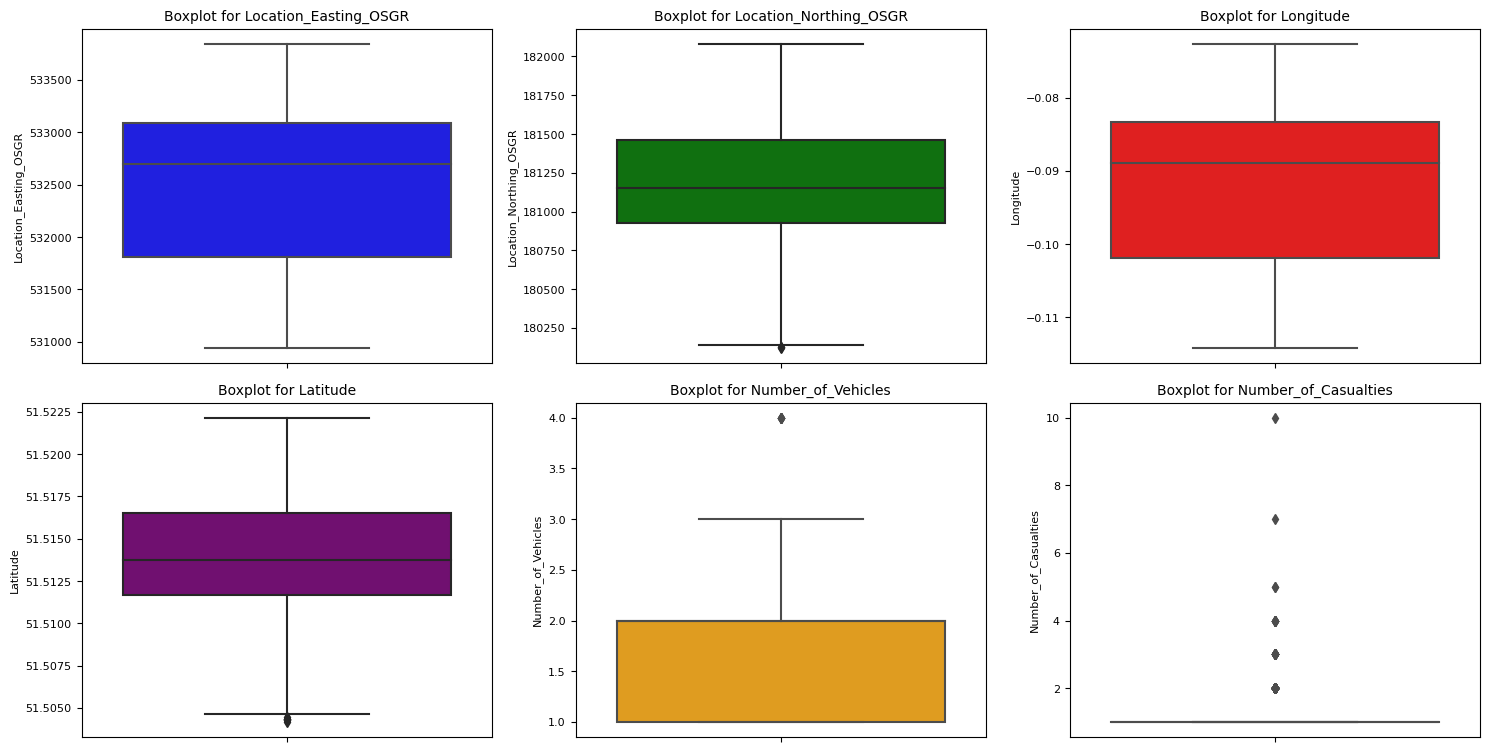

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric variables
filtered_data_numeric = filtered_data.select_dtypes(include='number')

# Initialize the figure
fig = plt.figure(figsize=(15, 30))

# Define a list of colors for each boxplot (adjust if you have more numeric columns)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'olive', 'lime']

# Loop through each numeric column to create a boxplot
for i in range(len(filtered_data_numeric.columns)):
    column = filtered_data_numeric.columns[i]  # Get column name
    sub = fig.add_subplot(8, 3, i + 1)  # Create subplot (adjust rows/columns as needed)
    sns.boxplot(data=filtered_data_numeric, y=column, palette=[colors[i % len(colors)]])  # Use modulo to cycle colors
    sub.set_title(f'Boxplot for {column}', fontsize=10)  # Add title directly to the subplot
    sub.set_ylabel(column, fontsize=8)
    sub.set_xlabel('')
    sub.tick_params(axis='x', labelsize=8)
    sub.tick_params(axis='y', labelsize=8)

# Adjust layout and explicitly show the figure
plt.tight_layout()
plt.show()

# Suppress output by ensuring no variables or return values are left in the last statement
_ = None


<Axes: xlabel='Location_Easting_OSGR', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Location_Easting_OSGR')

Text(0.5, 0, 'Location_Easting_OSGR')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Location_Northing_OSGR', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Location_Northing_OSGR')

Text(0.5, 0, 'Location_Northing_OSGR')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Longitude', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Latitude', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Latitude')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Number_of_Vehicles', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Number_of_Vehicles')

Text(0.5, 0, 'Number_of_Vehicles')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Number_of_Casualties', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Number_of_Casualties')

Text(0.5, 0, 'Number_of_Casualties')

Text(0, 0.5, 'Frequency')

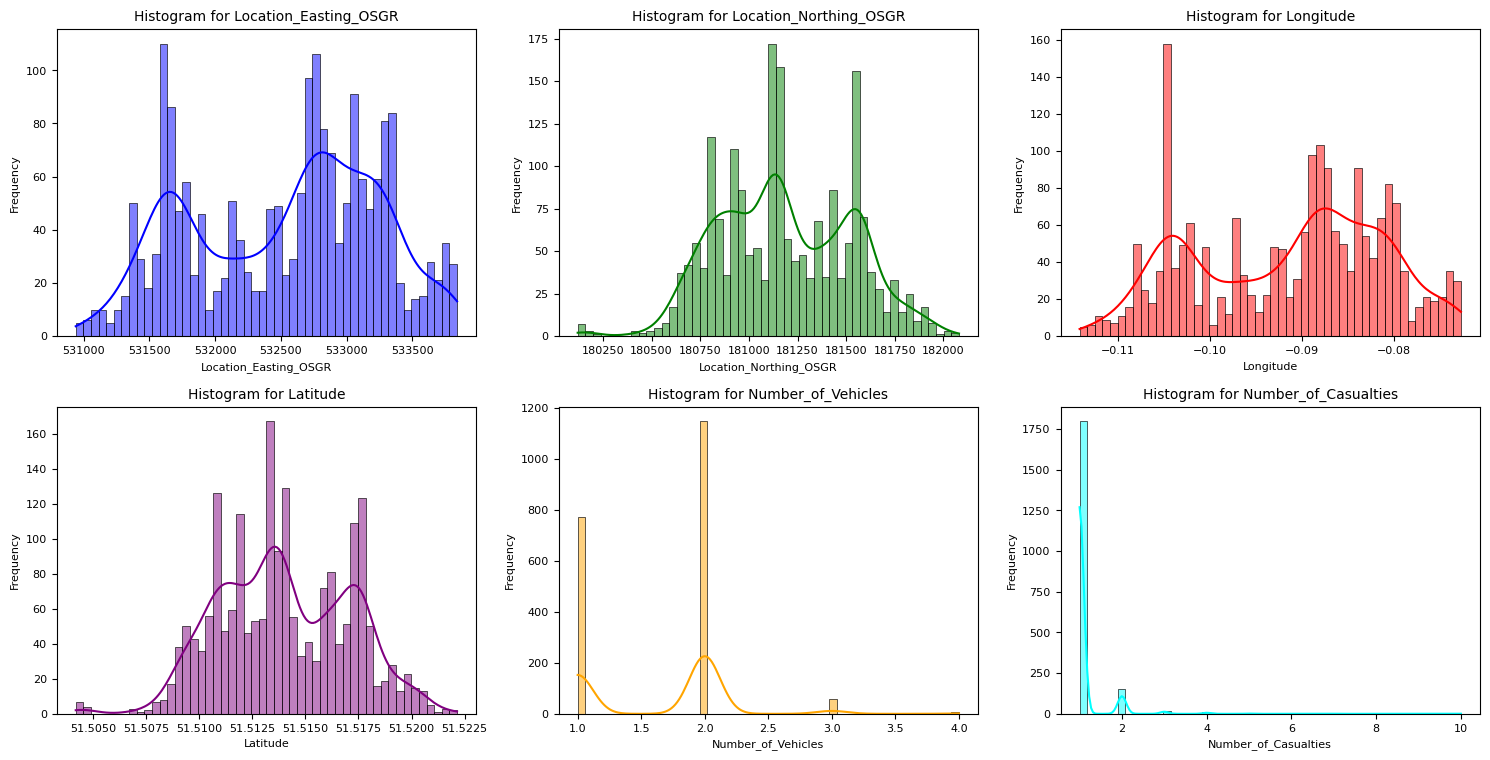

In [21]:
# Select numeric variables
filtered_data_numeric = filtered_data.select_dtypes(include='number')

# Initialize the figure
fig = plt.figure(figsize=(15, 30))

# Define a list of colors for each histogram plot (adjust for the number of columns)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'olive', 'lime']

# Loop through numeric columns and plot histograms
for i, column in enumerate(filtered_data_numeric.columns):
    sub = fig.add_subplot(8, 3, i + 1)  # Create subplot
    sns.histplot(data=filtered_data_numeric, x=column, bins=50, color=colors[i % len(colors)], kde=True)  # Histogram
    sub.set_title(f'Histogram for {column}', fontsize=10)  # Add title
    sub.set_xlabel(column, fontsize=8)
    sub.set_ylabel('Frequency', fontsize=8)
    sub.tick_params(axis='x', labelsize=8)
    sub.tick_params(axis='y', labelsize=8)

# Adjust layout and explicitly show the figure
plt.tight_layout()
plt.show()

# Suppress any unwanted outputs
_ = None


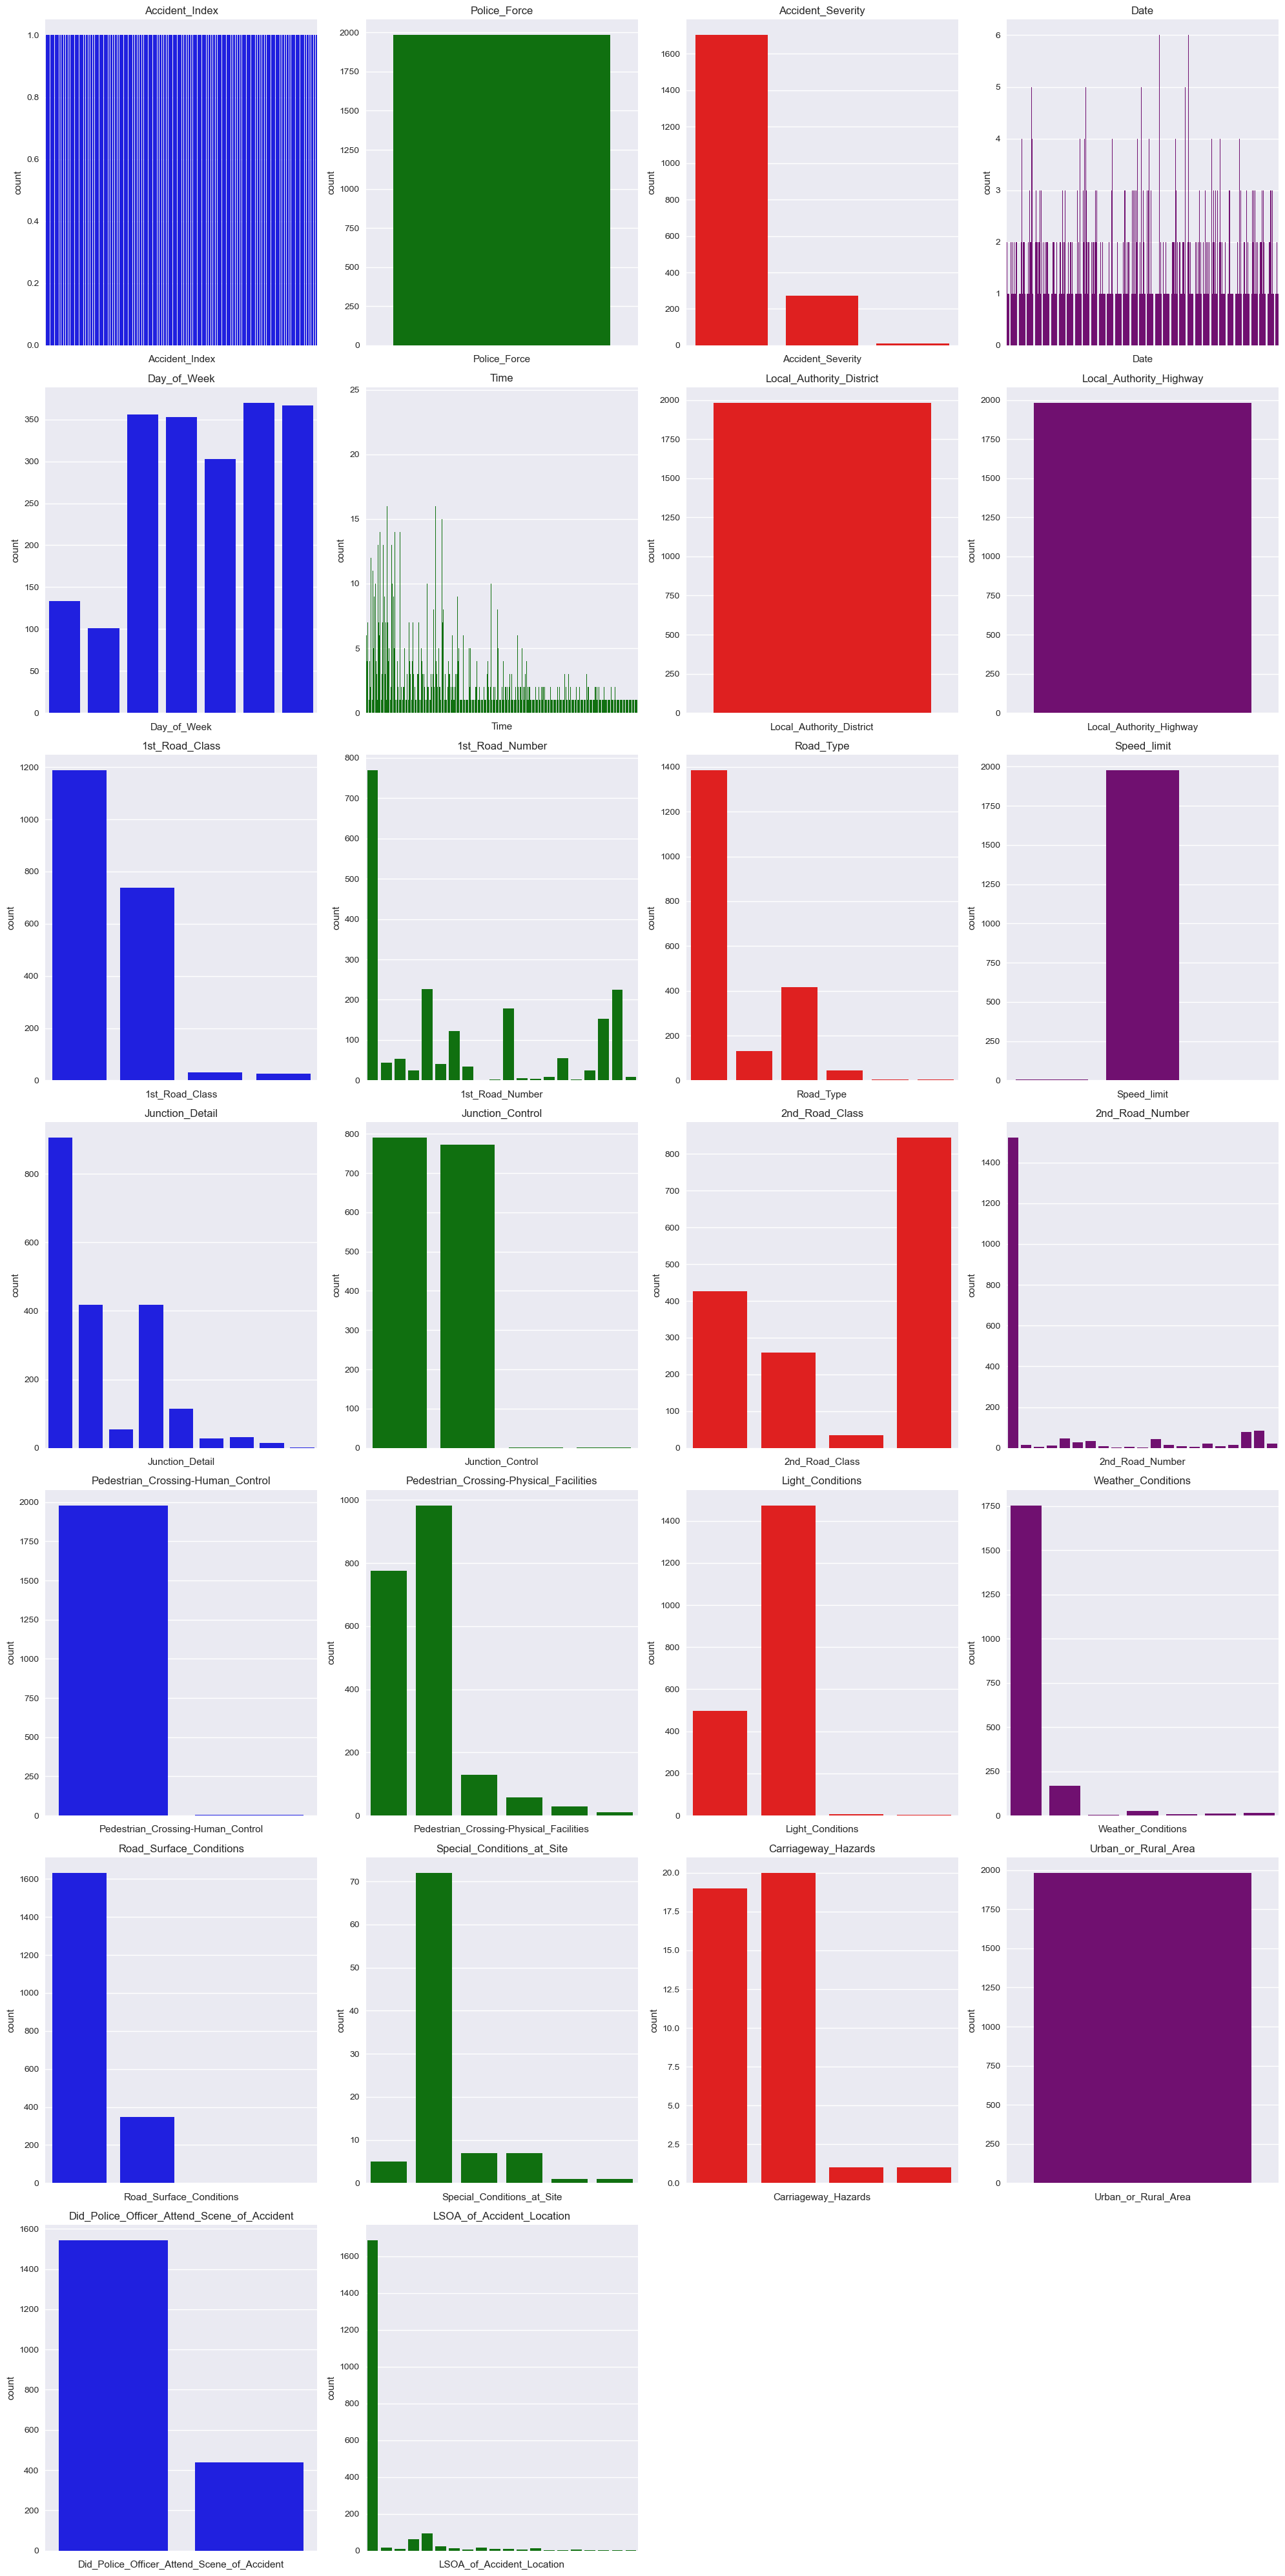

In [22]:
# Get all categorical columns explicitly
categorical_columns = [
    'Accident_Index', 'Police_Force', 'Accident_Severity', 'Date', 'Day_of_Week',
    'Time', 'Local_Authority_District', 'Local_Authority_Highway', '1st_Road_Class',
    '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
    'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'
]

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20, 40))  # Reduced height from 100 to 40
    
    # Define colors
    colors = ['blue', 'green', 'red', 'purple']
    color_pattern = colors * ((len(categorical_columns) // len(colors)) + 1)
    
    # Create plots with 4 columns
    for i, column in enumerate(categorical_columns):
        sub = fig.add_subplot(7, 4, i + 1)
        _ = sns.countplot(data=filtered_data, x=column, color=color_pattern[i])
        _ = sub.set_xticklabels([])
        _ = sub.set_title(column)
        _ = sub.tick_params(axis='x', length=0)
    
    _ = plt.tight_layout()
    plt.show()
    plt.close('all')

# Suppress final output
_ = None

In [24]:
# Select numeric columns from the filtered data
numeric_data = filtered_data.select_dtypes(include=[np.number])

# Calculate skewness and kurtosis
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()

# Print skewness and kurtosis with clear formatting
print("Skewness of Numeric Columns:\n")
for column, value in skewness.items():
    print(f"{column}: {value:.2f}")

print("\nKurtosis of Numeric Columns:\n")
for column, value in kurtosis.items():
    print(f"{column}: {value:.2f}")

Skewness of Numeric Columns:

Location_Easting_OSGR: -0.22
Location_Northing_OSGR: 0.06
Longitude: -0.21
Latitude: 0.02
Number_of_Vehicles: 0.22
Number_of_Casualties: 7.35

Kurtosis of Numeric Columns:

Location_Easting_OSGR: -1.06
Location_Northing_OSGR: -0.52
Longitude: -1.07
Latitude: -0.49
Number_of_Vehicles: -0.01
Number_of_Casualties: 92.94


In [25]:
from IPython.display import display, HTML

# Selected variables
selected_variables = [
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude',
    'Accident_Severity',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Day_of_Week',
    'Time',
    'Road_Type',
    'Speed_limit',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions'
]

# Creating a new DataFrame with only the selected variables
descriptive_model_data = filtered_data[selected_variables]

# Display the first few rows in a structured table format
print("Descriptive Model Data:")
display(descriptive_model_data.head())

# Display the data types of the selected variables in a structured format
print("\nData Types:")
display(descriptive_model_data.dtypes.to_frame(name='Data Type').reset_index().rename(columns={'index': 'Column'}))


Descriptive Model Data:


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
742,533230,181490,-0.081260,51.516575,Slight,2,1,Saturday,22:50:00,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry
743,533740,180550,-0.074271,51.508007,Slight,2,1,Sunday,20:50:00,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry
744,533230,181500,-0.081256,51.516665,Slight,3,1,Sunday,10:02:00,Single carriageway,30,Daylight,Fine no high winds,Dry
745,531750,180830,-0.102824,51.510991,Slight,2,3,Saturday,02:45:00,One way street,30,Darkness - lights lit,Raining no high winds,Wet or damp
746,532930,181500,-0.085578,51.516735,Slight,1,1,Tuesday,12:30:00,Dual carriageway,30,Daylight,Fine no high winds,Dry



Data Types:


,Column,Data Type
0,Location_Easting_OSGR,int64
1,Location_Northing_OSGR,int64
2,Longitude,float64
3,Latitude,float64
4,Accident_Severity,object
5,Number_of_Vehicles,int64
6,Number_of_Casualties,int64
7,Day_of_Week,object
8,Time,object
9,Road_Type,object


Missing Values Count:
 Junction_Control               417
2nd_Road_Class                 417
Special_Conditions_at_Site    1890
Carriageway_Hazards           1942
LSOA_of_Accident_Location       10
dtype: int64

Missing Values Percentage:
 Junction_Control              21.028744
2nd_Road_Class                21.028744
Special_Conditions_at_Site    95.310136
Carriageway_Hazards           97.932426
LSOA_of_Accident_Location      0.504286
dtype: float64

Missing values after treatment:
 0
Applying log transformation to: Number_of_Casualties (Skewness: 7.35)
Handling outliers for: Number_of_Casualties (Kurtosis: 92.94)

Skewness after treatment:
 Location_Easting_OSGR    -0.214593
Location_Northing_OSGR    0.054171
Longitude                -0.212994
Latitude                  0.020280
Number_of_Vehicles        0.128533
Number_of_Casualties      3.126659
dtype: float64

Kurtosis after treatment:
 Location_Easting_OSGR    -1.059075
Location_Northing_OSGR   -0.513029
Longitude                -

array([[<Axes: title={'center': 'Location_Easting_OSGR'}>,
        <Axes: title={'center': 'Location_Northing_OSGR'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Number_of_Vehicles'}>,
        <Axes: title={'center': 'Number_of_Casualties'}>]], dtype=object)

Text(0.5, 0.98, 'Distributions After Transformation')

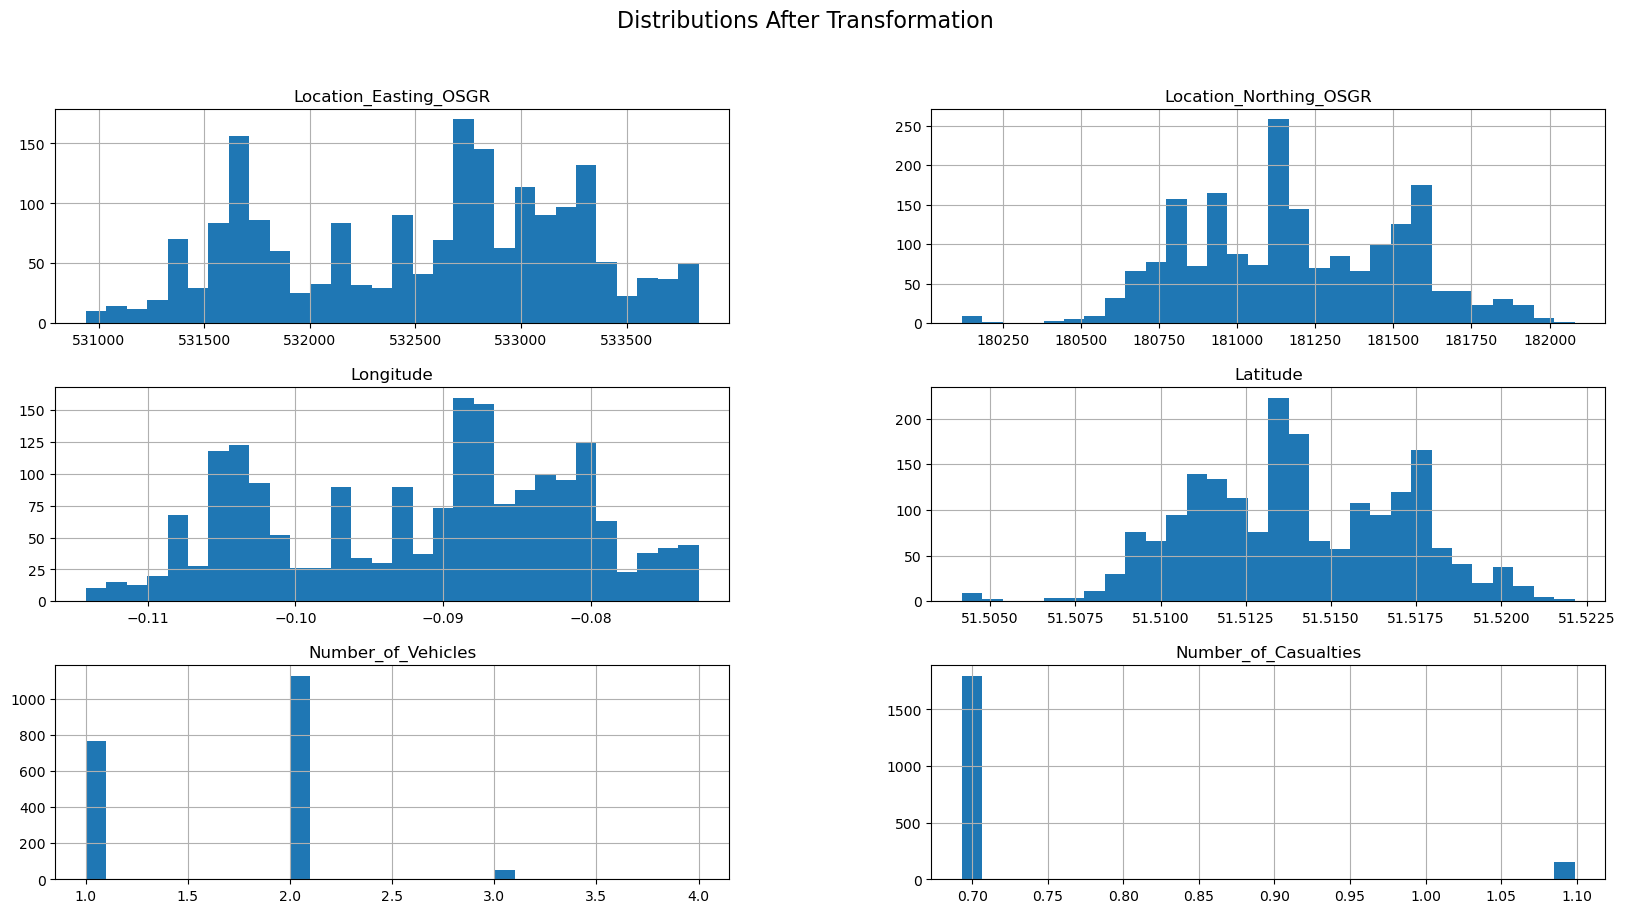

In [27]:
# Check for missing values
missing_values_count = filtered_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(filtered_data)) * 100

# Display missing values count and percentage
print("Missing Values Count:\n", missing_values_count[missing_values_count > 0])
print("\nMissing Values Percentage:\n", missing_values_percentage[missing_values_percentage > 0])

# Fill missing values (mean for numeric, mode for categorical)
for column in filtered_data.columns:
    if filtered_data[column].dtype in [np.float64, np.int64]:  # Numeric columns
        filtered_data[column].fillna(filtered_data[column].mean(), inplace=True)
    else:  # Categorical columns
        filtered_data[column].fillna(filtered_data[column].mode()[0], inplace=True)

print("\nMissing values after treatment:\n", filtered_data.isnull().sum().sum())

# Handle skewness (log transformation for highly skewed numeric columns)
numeric_data = filtered_data.select_dtypes(include=[np.number])
skewness = numeric_data.skew()

for column, value in skewness.items():
    if abs(value) > 2:  # Log transformation for absolute skew > 2
        print(f"Applying log transformation to: {column} (Skewness: {value:.2f})")
        filtered_data[column] = np.log1p(filtered_data[column])  # Handle zero values

# Handle kurtosis (detect and remove outliers based on z-scores)
kurtosis = numeric_data.kurtosis()
for column, value in kurtosis.items():
    if value > 10:  # Threshold for extreme kurtosis
        print(f"Handling outliers for: {column} (Kurtosis: {value:.2f})")
        z_scores = zscore(filtered_data[column])
        filtered_data = filtered_data[(np.abs(z_scores) < 3)]  # Remove outliers with z-score > 3

# Recalculate skewness and kurtosis after treatment
new_skewness = filtered_data.select_dtypes(include=[np.number]).skew()
new_kurtosis = filtered_data.select_dtypes(include=[np.number]).kurtosis()

print("\nSkewness after treatment:\n", new_skewness)
print("\nKurtosis after treatment:\n", new_kurtosis)

# Visualize numeric variable distributions after transformation
filtered_data.select_dtypes(include=[np.number]).hist(figsize=(20, 10), bins=30)
plt.suptitle("Distributions After Transformation", fontsize=16)
plt.show()


In [31]:
from IPython.display import display, HTML

# Check basic statistics
print("Basic Statistics for Selected Variables:")
display(descriptive_model_data.describe(include='all').transpose())  # Transpose for better readability

# Check for remaining missing values
missing_values_count = descriptive_model_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(descriptive_model_data)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
}).query('`Missing Count` > 0')

print("\nRemaining Missing Values (if any):")
display(missing_summary)

Basic Statistics for Selected Variables:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1983.0,NaN,NaN,NaN,532531.931417,709.060756,530940.0,531810.0,532700.0,533090.0,533840.0
Location_Northing_OSGR,1983.0,NaN,NaN,NaN,181183.388805,338.429646,180120.0,180930.0,181150.0,181460.0,182080.0
Longitude,1983.0,NaN,NaN,NaN,-0.09143,0.010198,-0.114204,-0.101829,-0.088901,-0.083362,-0.07269
Latitude,1983.0,NaN,NaN,NaN,51.513983,0.003066,51.504174,51.511689,51.513746,51.516512,51.522147
Accident_Severity,1983,3,Slight,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_Vehicles,1983.0,NaN,NaN,NaN,1.645991,0.554536,1.0,1.0,2.0,2.0,4.0
Number_of_Casualties,1983.0,NaN,NaN,NaN,1.121029,0.464129,1.0,1.0,1.0,1.0,10.0
Day_of_Week,1983,7,Wednesday,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,1983,752,08:30:00,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Road_Type,1983,6,Single carriageway,1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Remaining Missing Values (if any):


,Missing Count,Missing Percentage


Correlation Matrix for Selected Numeric Variables:


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Speed_limit
Location_Easting_OSGR,1.000000,-0.118991,0.999923,-0.172238,-0.129618,0.020538,-0.050784
Location_Northing_OSGR,-0.118991,1.000000,-0.106677,0.998552,-0.095066,-0.005696,0.071187
Longitude,0.999923,-0.106677,1.000000,-0.160018,-0.130989,0.020496,-0.049958
Latitude,-0.172238,0.998552,-0.160018,1.000000,-0.087292,-0.006761,0.073388
Number_of_Vehicles,-0.129618,-0.095066,-0.130989,-0.087292,1.000000,0.037172,-0.028249
Number_of_Casualties,0.020538,-0.005696,0.020496,-0.006761,0.037172,1.000000,-0.014978
Speed_limit,-0.050784,0.071187,-0.049958,0.073388,-0.028249,-0.014978,1.000000


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Selected Variables')

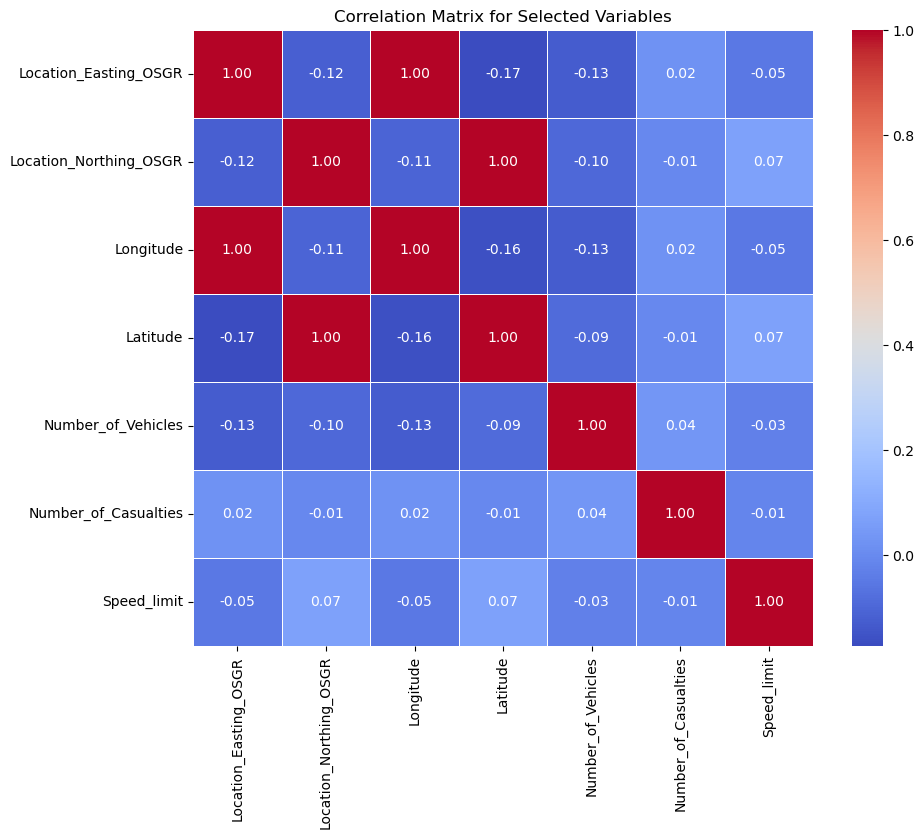

In [32]:
# Select numeric variables
numeric_columns = [
    'Location_Easting_OSGR', 
    'Location_Northing_OSGR', 
    'Longitude', 
    'Latitude', 
    'Number_of_Vehicles', 
    'Number_of_Casualties', 
    'Speed_limit'
]

# Compute the correlation matrix
correlation_matrix = descriptive_model_data[numeric_columns].corr()

# Display the correlation matrix as a table
print("Correlation Matrix for Selected Numeric Variables:")
display(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Selected Variables')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Accident Severity by Geographical Location')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

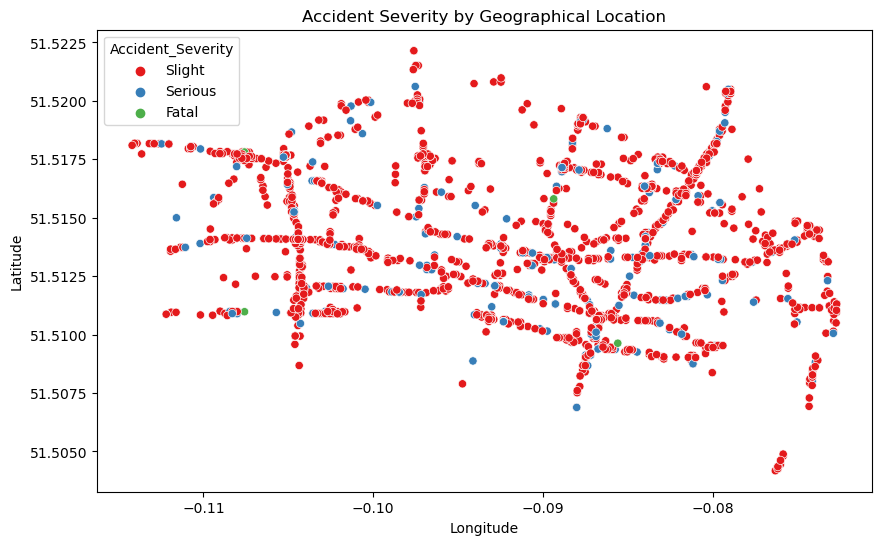

In [33]:
# Scatterplot: Longitude vs Latitude colored by Accident Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=descriptive_model_data, x='Longitude', y='Latitude', hue='Accident_Severity', palette='Set1')
plt.title("Accident Severity by Geographical Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Road_Type', ylabel='Number_of_Casualties'>

Text(0.5, 1.0, 'Number of Casualties by Road Type')

Text(0.5, 0, 'Road Type')

Text(0, 0.5, 'Number of Casualties')

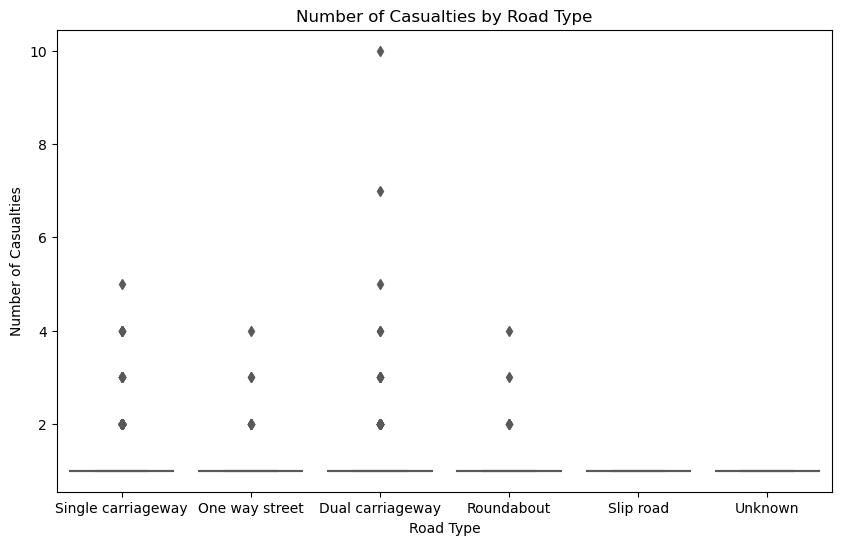

In [34]:
# Boxplot: Road Type vs Number of Casualties
plt.figure(figsize=(10, 6))
sns.boxplot(data=descriptive_model_data, x='Road_Type', y='Number_of_Casualties', palette='Set2')
plt.title("Number of Casualties by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.show()


In [37]:
# Dropping the redundant columns
descriptive_model_data = descriptive_model_data.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

# Confirm the columns have been dropped
print("Updated DataFrame After Dropping Redundant Columns:")
display(descriptive_model_data.head())


Updated DataFrame After Dropping Redundant Columns:


,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
742,-0.081260,51.516575,Slight,2,1,Saturday,22:50:00,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry
743,-0.074271,51.508007,Slight,2,1,Sunday,20:50:00,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry
744,-0.081256,51.516665,Slight,3,1,Sunday,10:02:00,Single carriageway,30,Daylight,Fine no high winds,Dry
745,-0.102824,51.510991,Slight,2,3,Saturday,02:45:00,One way street,30,Darkness - lights lit,Raining no high winds,Wet or damp
746,-0.085578,51.516735,Slight,1,1,Tuesday,12:30:00,Dual carriageway,30,Daylight,Fine no high winds,Dry


In [38]:
from IPython.display import display

# List of categorical variables
categorical_variables = descriptive_model_data.select_dtypes(include=['object']).columns

# Create a DataFrame for better presentation
categorical_variables_df = pd.DataFrame({
    'Categorical Variables': categorical_variables
})

# Display the table
print("Remaining Categorical Variables in the DataFrame:")
display(categorical_variables_df)


Remaining Categorical Variables in the DataFrame:


,Categorical Variables
0,Accident_Severity
1,Day_of_Week
2,Time
3,Road_Type
4,Speed_limit
5,Light_Conditions
6,Weather_Conditions
7,Road_Surface_Conditions


In [39]:
# Applying one-hot encoding to the remaining categorical variables
encoded_data = pd.get_dummies(descriptive_model_data, columns=categorical_variables, drop_first=True)  # Drop first for k-1 encoding

# Display the first few rows of the modified DataFrame
print("DataFrame After One-Hot Encoding:")
display(encoded_data.head())

# Display the shape of the DataFrame after encoding
print(f"Shape of DataFrame After Encoding: {encoded_data.shape}")


DataFrame After One-Hot Encoding:


,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Accident_Severity_Serious,Accident_Severity_Slight,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,...,Light_Conditions_Daylight,Weather_Conditions_Fine no high winds,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,Weather_Conditions_Raining no high winds,Weather_Conditions_Snowing no high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp
742,-0.081260,51.516575,2,1,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
743,-0.074271,51.508007,2,1,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
744,-0.081256,51.516665,3,1,False,True,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False
745,-0.102824,51.510991,2,3,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
746,-0.085578,51.516735,1,1,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


Shape of DataFrame After Encoding: (1983, 782)


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical variables for standardization
numerical_variables = ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties']

# Apply standardization to the selected variables
encoded_data[numerical_variables] = scaler.fit_transform(encoded_data[numerical_variables])

# Display the first few rows of the modified DataFrame
print("DataFrame After Standardization:")
display(encoded_data.head())


DataFrame After Standardization:


,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Accident_Severity_Serious,Accident_Severity_Slight,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,...,Light_Conditions_Daylight,Weather_Conditions_Fine no high winds,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,Weather_Conditions_Raining no high winds,Weather_Conditions_Snowing no high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp
742,0.997517,0.845681,0.638549,-0.260831,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
743,1.683007,-1.949965,0.638549,-0.260831,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
744,0.997910,0.875047,2.442312,-0.260831,False,True,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False
745,-1.117505,-0.976318,0.638549,4.049407,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
746,0.574003,0.897887,-1.165215,-0.260831,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Inertia')

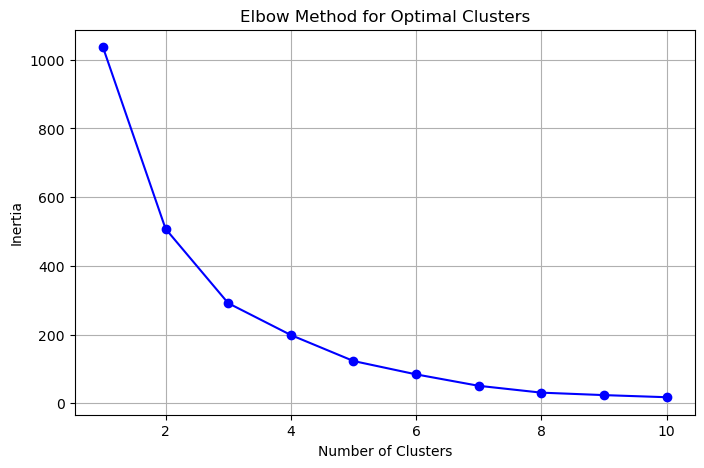

C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hmbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


DataFrame with Cluster Labels:


,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Cluster
742,-0.081260,51.516575,Slight,2,1,Saturday,22:50:00,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry,0
743,-0.074271,51.508007,Slight,2,1,Sunday,20:50:00,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry,0
744,-0.081256,51.516665,Slight,3,1,Sunday,10:02:00,Single carriageway,30,Daylight,Fine no high winds,Dry,4
745,-0.102824,51.510991,Slight,2,3,Saturday,02:45:00,One way street,30,Darkness - lights lit,Raining no high winds,Wet or damp,3
746,-0.085578,51.516735,Slight,1,1,Tuesday,12:30:00,Dual carriageway,30,Daylight,Fine no high winds,Dry,1


In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select only numeric variables for clustering
numeric_columns = descriptive_model_data.select_dtypes(include=[np.number]).columns
numeric_descriptive_model_data = descriptive_model_data[numeric_columns]

# Apply KMeans clustering with the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_descriptive_model_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the number of clusters (based on the elbow point)
optimal_k = 5  # Replace with the optimal number of clusters identified
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
descriptive_model_data['Cluster'] = kmeans.fit_predict(numeric_descriptive_model_data)

# Display the first few rows of the DataFrame with clusters
print("DataFrame with Cluster Labels:")
display(descriptive_model_data.head())


In [46]:
# Restrict to numeric columns for the mean calculation
numeric_columns = descriptive_model_data.select_dtypes(include=[np.number]).columns
cluster_summary = descriptive_model_data.groupby('Cluster')[numeric_columns].mean()

# Display the summary table in your environment
print("Cluster Summary (Mean of Numeric Variables by Cluster):")
print(cluster_summary)


Cluster Summary (Mean of Numeric Variables by Cluster):
         Longitude   Latitude  Number_of_Vehicles  Number_of_Casualties  \
Cluster                                                                   
0        -0.092737  51.513817            2.000000              1.000000   
1        -0.089648  51.514287            1.000000              1.000000   
2        -0.091450  51.513649            1.846154              4.846154   
3        -0.090192  51.514285            1.447368              2.092105   
4        -0.091588  51.512833            3.112903              1.387097   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Clusters Based on Geographical Location')

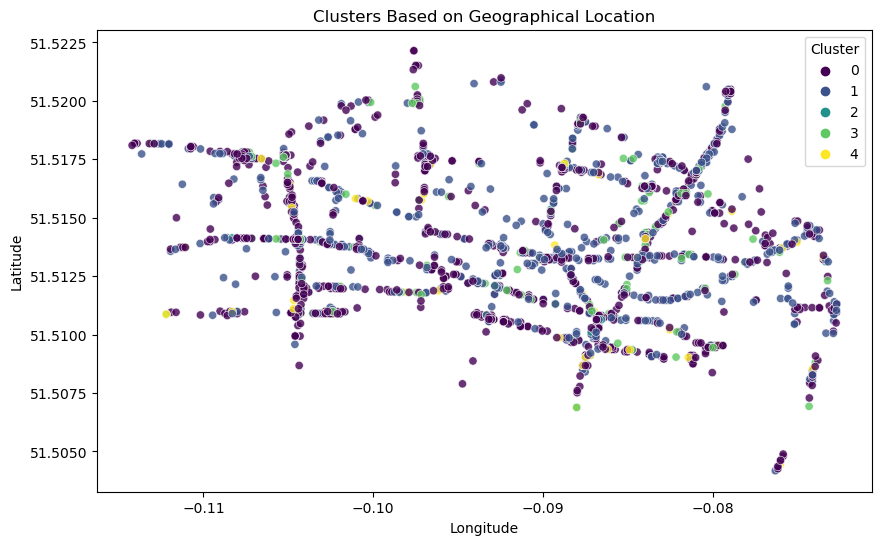

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters based on two numeric variables
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=descriptive_model_data, 
    x='Longitude', 
    y='Latitude', 
    hue='Cluster', 
    palette='viridis', 
    alpha=0.8
)
plt.title('Clusters Based on Geographical Location')
plt.show()


In [50]:

# Select numeric columns for summarizing
numeric_columns = descriptive_model_data.select_dtypes(include=[np.number]).columns

# Summarize numeric variables by cluster
numeric_summary = descriptive_model_data.groupby('Cluster')[numeric_columns].mean()
print("Numeric Summary by Cluster:\n", numeric_summary)

# If you want to summarize categorical columns, use mode instead
categorical_columns = descriptive_model_data.select_dtypes(exclude=[np.number]).columns

# Summarize categorical variables by cluster using mode
categorical_summary = descriptive_model_data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0])
print("\nCategorical Summary by Cluster:\n", categorical_summary)


Numeric Summary by Cluster:
          Longitude   Latitude  Number_of_Vehicles  Number_of_Casualties  \
Cluster                                                                   
0        -0.092737  51.513817            2.000000              1.000000   
1        -0.089648  51.514287            1.000000              1.000000   
2        -0.091450  51.513649            1.846154              4.846154   
3        -0.090192  51.514285            1.447368              2.092105   
4        -0.091588  51.512833            3.112903              1.387097   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  

Categorical Summary by Cluster:
         Accident_Severity Day_of_Week      Time           Road_Type  \
Cluster                                                               
0                  Slight    Thursday  08:30:00  Single carriageway   
1                  Slight      Friday  08:55:00  Single carriagew

<Axes: xlabel='Cluster'>

Text(0.5, 1.0, 'Average Numeric Variables by Cluster')

Text(0, 0.5, 'Average Value')

Text(0.5, 0, 'Cluster')

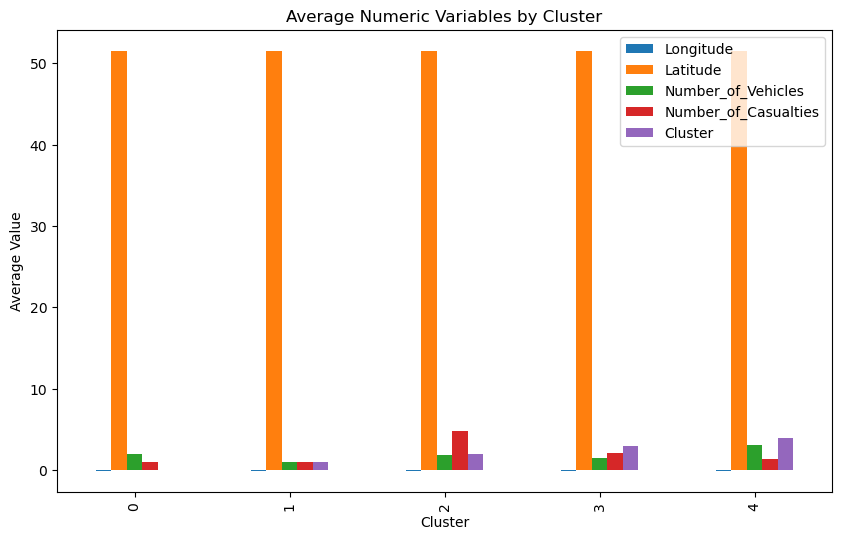

<Axes: title={'center': 'Distribution of Accident_Severity in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

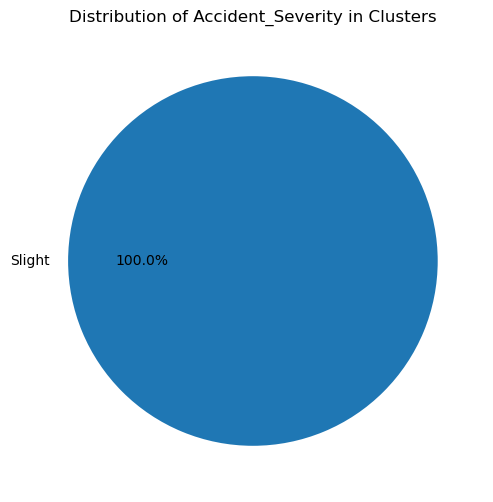

<Axes: title={'center': 'Distribution of Day_of_Week in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

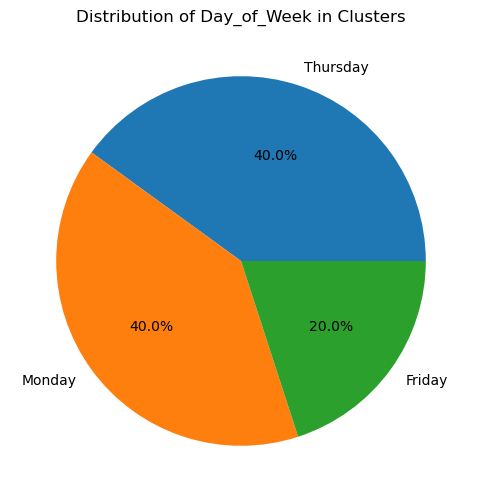

<Axes: title={'center': 'Distribution of Time in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

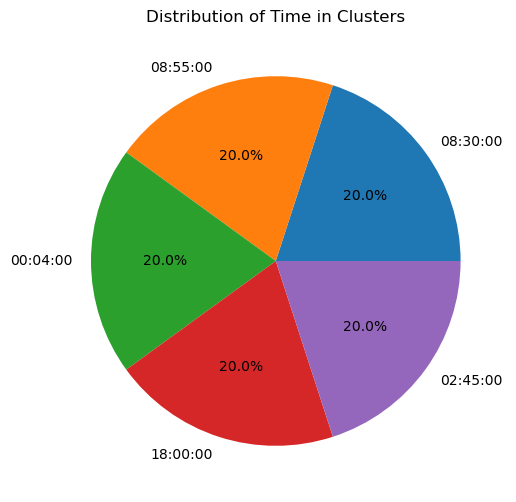

<Axes: title={'center': 'Distribution of Road_Type in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

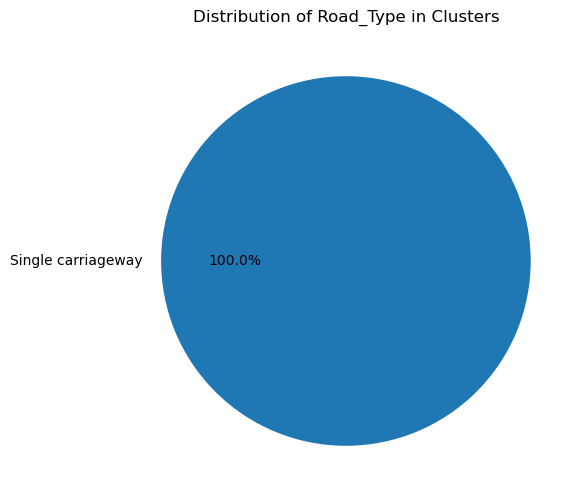

<Axes: title={'center': 'Distribution of Speed_limit in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

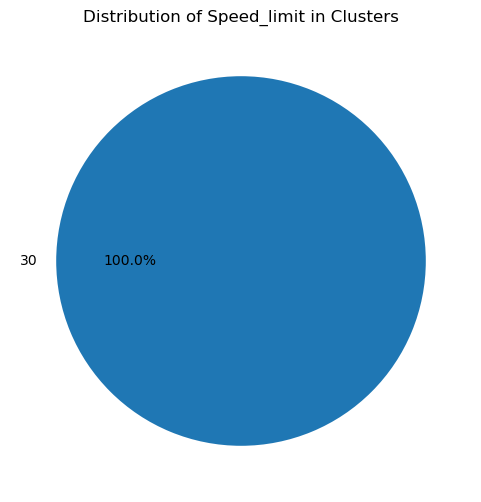

<Axes: title={'center': 'Distribution of Light_Conditions in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

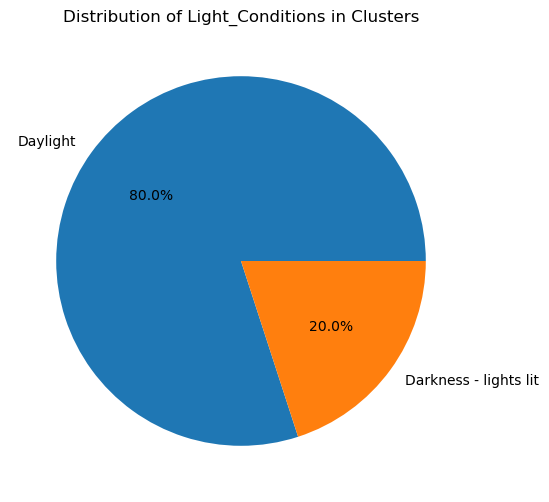

<Axes: title={'center': 'Distribution of Weather_Conditions in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

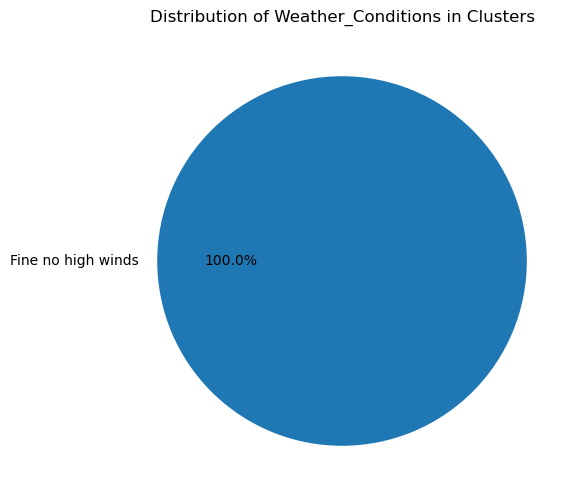

<Axes: title={'center': 'Distribution of Road_Surface_Conditions in Clusters'}, ylabel='count'>

Text(0, 0.5, '')

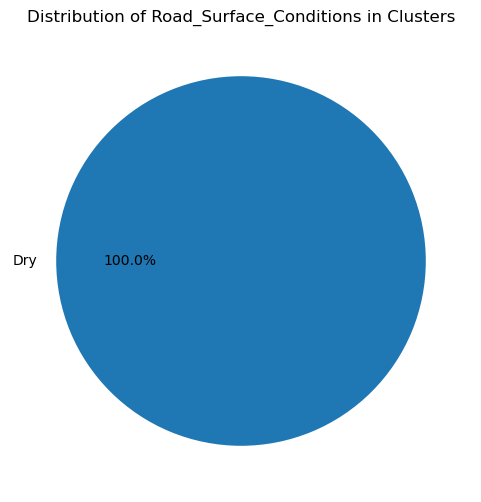

In [51]:
import matplotlib.pyplot as plt

# Bar plot for numeric summary
numeric_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Numeric Variables by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.legend(loc='upper right')
plt.show()

# Pie chart for categorical variables
for column in categorical_summary.columns:
    categorical_summary[column].value_counts().plot.pie(
        autopct='%1.1f%%', figsize=(6, 6), title=f"Distribution of {column} in Clusters"
    )
    plt.ylabel('')
    plt.show()


Numeric Cluster Summary:
         Longitude   Latitude  Number_of_Vehicles  Number_of_Casualties  \
Cluster                                                                   
0        -0.092737  51.513817            2.000000              1.000000   
1        -0.089648  51.514287            1.000000              1.000000   
2        -0.091450  51.513649            1.846154              4.846154   
3        -0.090192  51.514285            1.447368              2.092105   
4        -0.091588  51.512833            3.112903              1.387097   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  

Categorical Cluster Summary:
        Accident_Severity Day_of_Week      Time           Road_Type  \
Cluster                                                               
0                  Slight    Thursday  08:30:00  Single carriageway   
1                  Slight      Friday  08:55:00  Single carriageway   
2 

<Axes: xlabel='Cluster'>

Text(0.5, 1.0, 'Cluster Characteristics (Numeric Variables)')

Text(0, 0.5, 'Average Value')

Text(0.5, 0, 'Cluster')

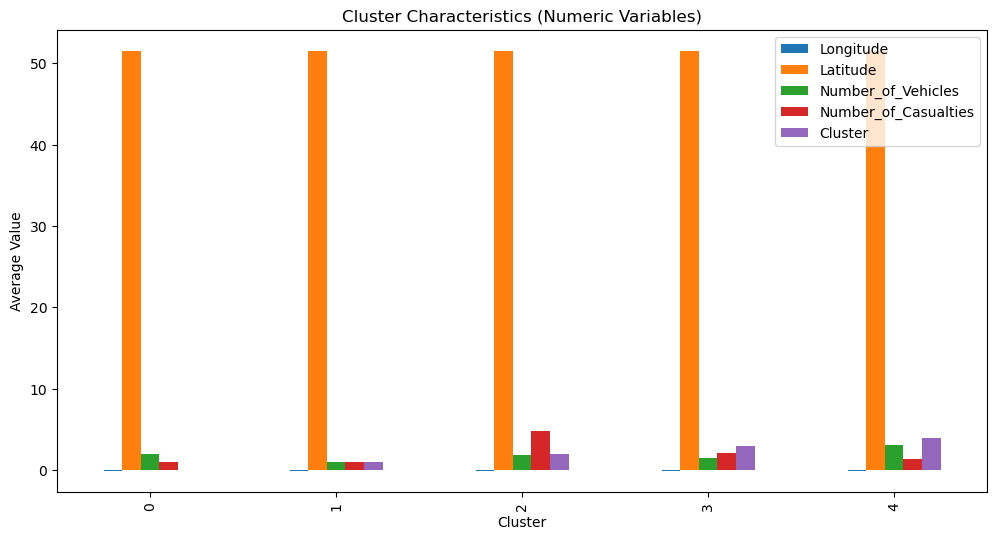

In [60]:
# Analyze clusters by summarizing numeric variables
numeric_columns = descriptive_model_data.select_dtypes(include=[np.number]).columns
cluster_summary_numeric = descriptive_model_data.groupby('Cluster')[numeric_columns].mean()
print("Numeric Cluster Summary:")
print(cluster_summary_numeric)

# Analyze clusters by summarizing categorical variables
categorical_columns = descriptive_model_data.select_dtypes(exclude=[np.number]).columns
cluster_summary_categorical = descriptive_model_data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])
print("\nCategorical Cluster Summary:")
print(cluster_summary_categorical)

# Visualize numeric cluster characteristics
import matplotlib.pyplot as plt

cluster_summary_numeric.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Characteristics (Numeric Variables)")
plt.ylabel("Average Value")
plt.xlabel("Cluster")
plt.legend(loc='upper right')
plt.show()


In [62]:
print(encoded_data.columns)  # List all columns in encoded_data



Index(['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Accident_Severity_Serious', 'Accident_Severity_Slight',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       'Day_of_Week_Thursday',
       ...
       'Light_Conditions_Daylight', 'Weather_Conditions_Fine no high winds',
       'Weather_Conditions_Other', 'Weather_Conditions_Raining + high winds',
       'Weather_Conditions_Raining no high winds',
       'Weather_Conditions_Snowing no high winds',
       'Weather_Conditions_Unknown', 'Road_Surface_Conditions_Frost or ice',
       'Road_Surface_Conditions_Snow', 'Road_Surface_Conditions_Wet or damp'],
      dtype='object', length=782)


DecisionTreeClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       216
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00        48
           4       0.89      1.00      0.94        17

    accuracy                           1.00       595
   macro avg       0.98      0.92      0.94       595
weighted avg       1.00      1.00      1.00       595


Confusion Matrix:


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

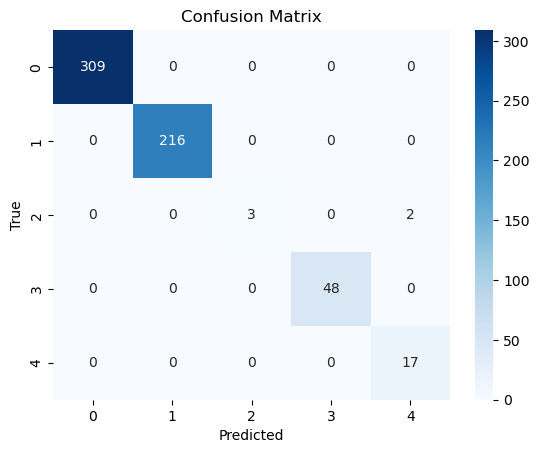


Accuracy Score:
0.9966386554621849


In [63]:
# Ensure Cluster column is in encoded_data
if 'Cluster' in descriptive_model_data.columns:
    encoded_data['Cluster'] = descriptive_model_data['Cluster']
else:
    raise KeyError("Cluster column not found in descriptive_model_data.")

# Features and Target
X = encoded_data.drop(columns=['Cluster'])  # Features
y = encoded_data['Cluster']  # Target (Cluster Labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


<Figure size 2000x1000 with 0 Axes>

[Text(0.4230769230769231, 0.9, 'Number_of_Vehicles <= -0.263\ngini = 0.578\nsamples = 1388\nvalue = [762, 469, 8, 104, 45]\nclass = 0'),
 Text(0.15384615384615385, 0.7, 'Number_of_Casualties <= 0.817\ngini = 0.202\nsamples = 529\nvalue = [0, 469, 2, 58, 0]\nclass = 4'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 469\nvalue = [0, 469, 0, 0, 0]\nclass = 4'),
 Text(0.23076923076923078, 0.5, 'Number_of_Casualties <= 5.127\ngini = 0.064\nsamples = 60\nvalue = [0, 0, 2, 58, 0]\nclass = 1'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 58\nvalue = [0, 0, 0, 58, 0]\nclass = 1'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = 3'),
 Text(0.6923076923076923, 0.7, 'Number_of_Casualties <= 0.817\ngini = 0.207\nsamples = 859\nvalue = [762, 0, 6, 46, 45]\nclass = 0'),
 Text(0.5384615384615384, 0.5, 'Number_of_Vehicles <= 1.54\ngini = 0.073\nsamples = 792\nvalue = [762, 0, 0, 0, 30]\nclass = 0'),
 Text(0.46153846153846156, 0.3, 'gini = 0

Text(0.5, 1.0, 'Decision Tree Visualization')

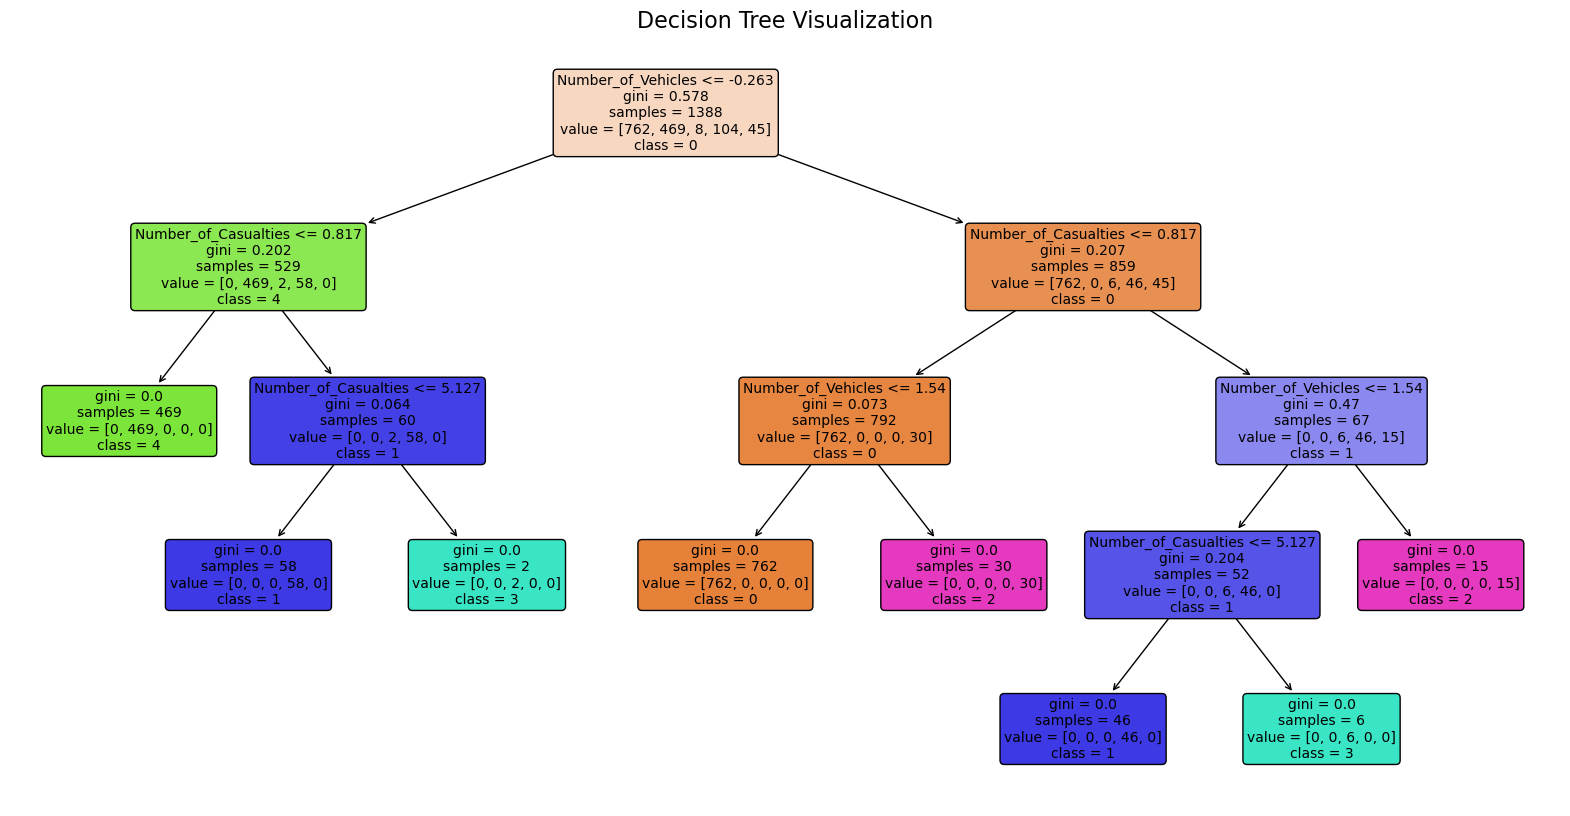

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(
    dt_model,  # Replace with your trained decision tree model
    feature_names=X.columns.tolist(),  # Convert to a list
    class_names=[str(cls) for cls in y.unique()],  # Target class names
    filled=True,  # Fill nodes with color
    rounded=True,  # Rounded nodes
    fontsize=10,  # Adjust the font size
)
plt.title("Decision Tree Visualization", fontsize=16)  # Add a title
plt.show()


In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


Cross-Validation Scores: [1.         0.99496222 0.98992443 1.         1.        ]
Mean Accuracy: 0.996977329974811


<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 20 Feature Importances')

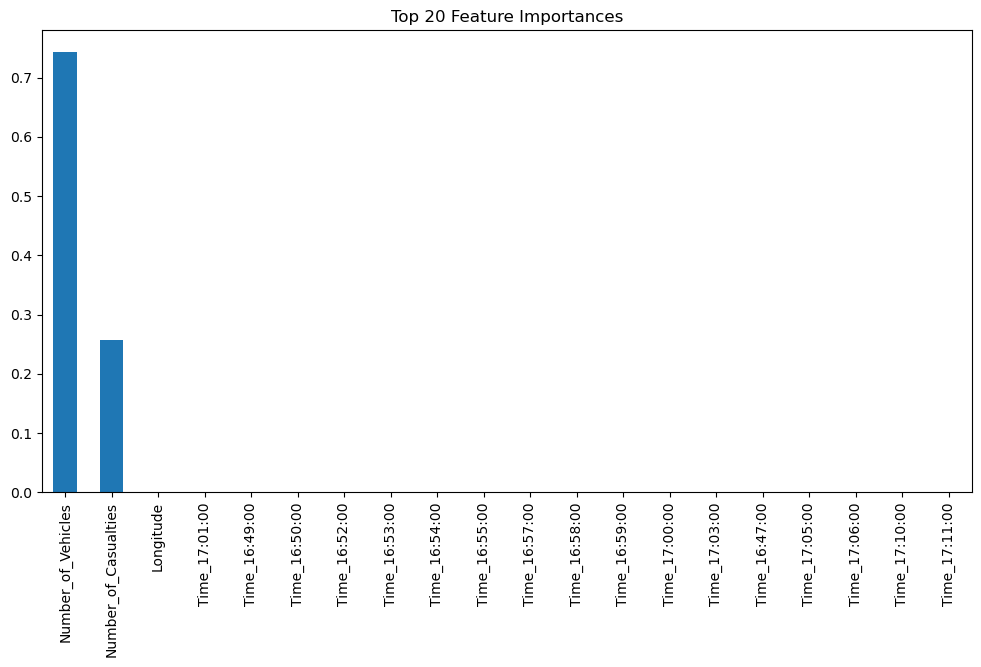

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
feature_importances.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.show()
